In [22]:
#import packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
from matplotlib.ticker import FuncFormatter

In [23]:
def findClosest(arr, target):
    pos = 0
    for a in arr:
        if abs(target-a) < abs(arr[pos]-target):
            pos = arr.index(a)  
    #print(target, arr[pos])
    return pos
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

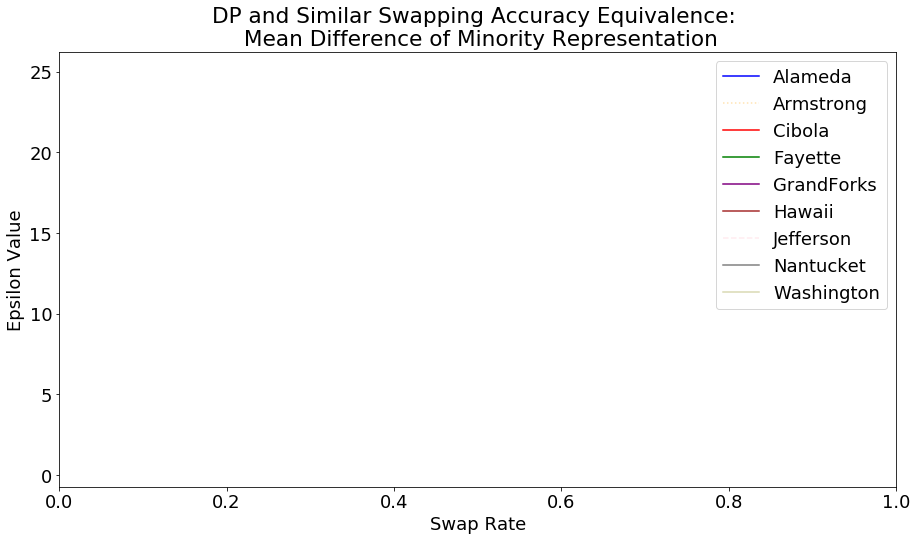

In [24]:
counties = ['Alameda', 'Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']
colors = ['blue', 'orange', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
#counties = ['Armstrong']
plt.figure(figsize=(15,8))
c = -1
for county in counties:
    c+=1
    swap_x = []
    swap_y = []
    dp_x = []
    dp_y = []

    swap_df = pd.read_csv (r'mean_dif/'+county+'/similar/swapping_final.csv')
    dp_df = pd.read_csv (r'mean_dif/'+county+'/dp/dp.csv')
    
    #print(dp_df)
    #for i, row in dp_df.iterrows():
    nn=0
    for i, row in swap_df.iterrows():
        swap_x.append(float(row['filename']))
        swap_y.append(row['mean_difference'])
    
    for i, row in dp_df.iterrows():
        dp_x.append(float(row['filename']))
        dp_y.append(row['mean_difference'])
    
    dp_x = [i * 5 for i in dp_x]

    close_swap = []
    close_swap1 = []
    close_dp = []
    close_dp1 = []
    value = []
    
    pos = 0
    for y in swap_y:
        closest = findClosest(dp_y, y)
#         print(dp_y[closest])
#         print(y)
        if dp_y[closest] <= y and abs(dp_y[closest]-y) <=.05:
            close_swap.append(swap_x[pos])
            close_dp.append(dp_x[closest])

        elif dp_y[closest] <= y:
            close_swap1.append(swap_x[pos])
            close_dp1.append(dp_x[closest])
            
        pos+=1

    plt.rcParams.update({'font.size': 18})
    axes= plt.axes()
    plt.xlabel('Swap Rate')
    plt.xlim([0,1])
    #plt.ylim([0,5])
    plt.ylabel('Epsilon Value')
    plt.title('DP and Similar Swapping Accuracy Equivalence: \n Mean Difference of Minority Representation')
    if county == 'Armstrong':
        plt.plot(close_swap, close_dp, ':', label=county, alpha=0.3, color = colors[c])
    elif county == 'Jefferson':
        plt.plot(close_swap, close_dp, '--', label=county, alpha=0.3, color = colors[c])
    elif county == 'Washington':
        plt.plot(close_swap, close_dp, '-', label=county, alpha=0.3, color = colors[c])
    else:
        plt.plot(close_swap, close_dp, label=county, color = colors[c])
    handles, labels = axes.get_legend_handles_labels()
    #plt.plot(close_swap1, close_dp1, ':',label=county, color = colors[c+1])
    axes.legend(handles, labels)
    plt.savefig('test1.png')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

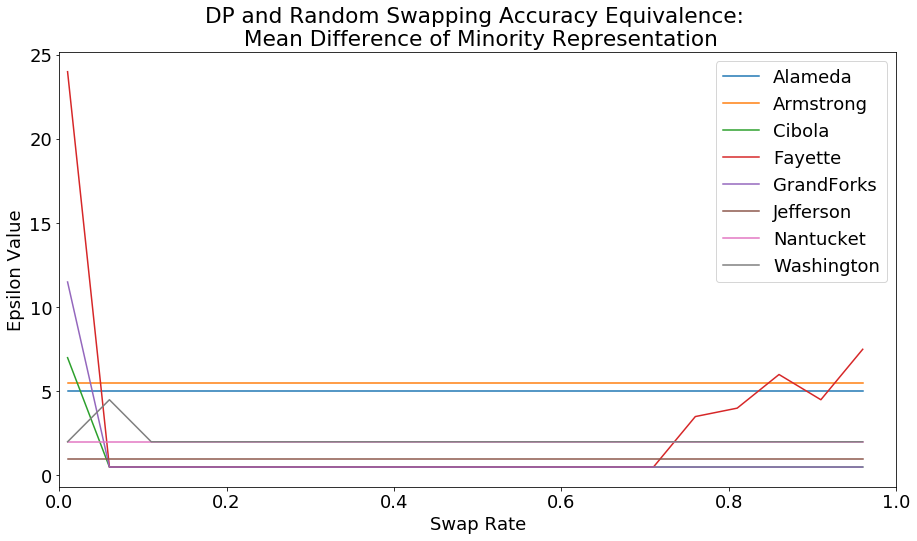

In [4]:
counties = ['Alameda', 'Armstrong', 'Cibola', 'Fayette', 'GrandForks','Jefferson', 'Nantucket', 'Washington']

plt.figure(figsize=(15,8))
for county in counties:

    swap_x = []
    swap_y = []
    dp_x = []
    dp_y = []

    swap_df = pd.read_csv (r'mean_dif/'+county+'/random/swapping_final.csv')
    dp_df = pd.read_csv (r'mean_dif/'+county+'/dp/dp.csv')
    #for i, row in dp_df.iterrows():
    nn=0
    for i, row in swap_df.iterrows():
        swap_x.append(float(row['filename']))
        swap_y.append(row['mean_difference'])
    
    for i, row in dp_df.iterrows():
        dp_x.append(float(row['filename']))
        dp_y.append(row['mean_difference'])
    
    dp_x = [i * 5 for i in dp_x]
#     print(swap_x)
#     print(swap_y)
#     print(dp_x)
#     print(dp_y)
    close_swap = []
    close_dp = []
    value = []
    
    pos = 0
    for y in swap_y:
        closest = findClosest(dp_y, y)
        close_swap.append(swap_x[pos])
        close_dp.append(dp_x[closest])
        value.append(y)
        pos+=1

    plt.rcParams.update({'font.size': 18})
    axes= plt.axes()
    plt.xlabel('Swap Rate')
    plt.xlim([0,1])
    plt.ylabel('Epsilon Value')
    plt.title('DP and Random Swapping Accuracy Equivalence: \n Mean Difference of Minority Representation')
    plt.plot(close_swap, close_dp, label=county)
    handles, labels = axes.get_legend_handles_labels()
    axes.legend(handles, labels)
    plt.savefig('test1.png')
